<center>
    <h1> 
        Teste de Hipótese 1: Verificando os Canais de Cores de Diferentes Tipos de Documentos
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<center>
    <h4>Teste para verificar se é possível diferenciar documentos pelos seus canais de cores para do desafio 1 do Mandacaru.dev</h4>
    Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset
</center>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Amostra dos documentos <br>
2. Canais de cores de uma image <br>
3. Comparando os canais de cores dos documentos <br>
4. Comparando os canais de cores de um mesmo documento com tons diferentes <br>
4.1. Rg_frente  <br>
4.2. Cng_frente

##### Módulos utilizados

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1. Amostra dos documentos

In [4]:
cpf_frente = cv2.imread('imagens_originais/cpf_frente.jpg')
cpf_verso = cv2.imread('imagens_originais/cpf_verso.jpg')
rg_frente = cv2.imread('imagens_originais/rg_frente.jpg')
rg_verso = cv2.imread('imagens_originais/rg_verso.jpg')
cnh_frente = cv2.imread('imagens_originais/cnh_frente.jpg')
cnh_verso = cv2.imread('imagens_originais/cnh_verso.jpg')

In [5]:
# Convertendo as imagens de BGR para RGB (para mostrar as imagens com a cor nomal)
cpf_frente = cv2.cvtColor(cpf_frente, cv2.COLOR_BGR2RGB)
cpf_verso = cv2.cvtColor(cpf_verso, cv2.COLOR_BGR2RGB)
rg_frente = cv2.cvtColor(rg_frente, cv2.COLOR_BGR2RGB)
rg_verso = cv2.cvtColor(rg_verso, cv2.COLOR_BGR2RGB)
cnh_frente = cv2.cvtColor(cnh_frente, cv2.COLOR_BGR2RGB)
cnh_verso = cv2.cvtColor(cnh_verso, cv2.COLOR_BGR2RGB)

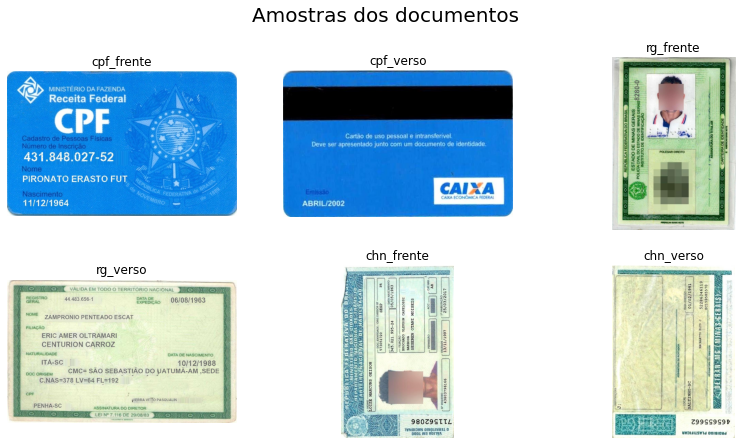

In [6]:
# plotando as amostras
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('cpf_frente')
plt.imshow(cpf_frente)

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('cpf_verso')
plt.imshow(cpf_verso)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('rg_frente')
plt.imshow(rg_frente)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('rg_verso')
plt.imshow(rg_verso)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('chn_frente')
plt.imshow(cnh_frente)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('chn_verso')
plt.imshow(cnh_verso)

fig.suptitle('Amostras dos documentos', fontsize=20)
plt.show();

## 2. Canais de cores de uma imagem

In [7]:
hist_red = cv2.calcHist(cpf_verso,[0],None,[256],[0,256])
hist_green = cv2.calcHist(cpf_verso,[1],None,[256],[0,256])
hist_blue = cv2.calcHist(cpf_verso,[2],None,[256],[0,256])
hist = cv2.calcHist(cpf_verso,[0],None,[256],[0,256])

In [8]:
plt.style.use('ggplot')

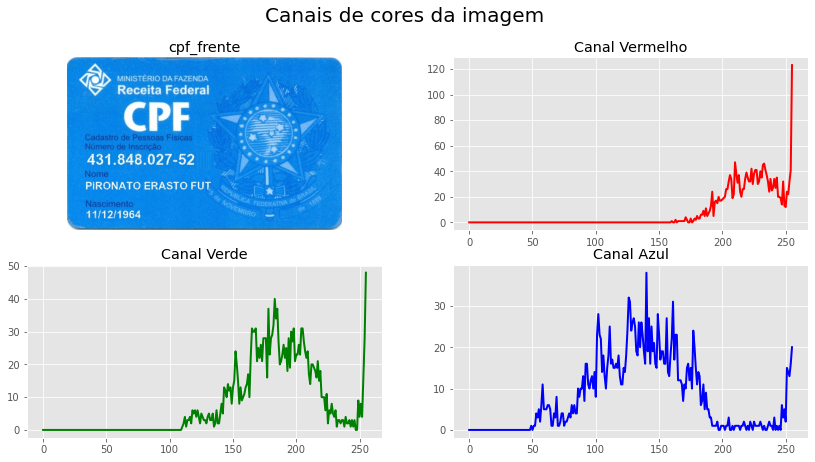

In [9]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,2,1); plt.axis('off')
plt.title('cpf_frente')
plt.imshow(cpf_frente)

fig.add_subplot(2,2,2);
plt.title('Canal Vermelho')
plt.plot(hist_red,color='red',lw=2)

fig.add_subplot(2,2,3);
plt.title('Canal Verde')
plt.plot(hist_green,color='green',lw=2)

fig.add_subplot(2,2,4);
plt.title('Canal Azul')
plt.plot(hist_blue,color='blue',lw=2)

fig.suptitle('Canais de cores da imagem', fontsize=20)
plt.show();

## 3. Comparando os canais de cores dos documentos

In [10]:
documentos = {
    'cpf_frente' : {'matriz' : cpf_frente},
    'cpf_verso' : {'matriz' : cpf_verso},
    'rg_frente' : {'matriz' : rg_frente},
    'rg_verso' : {'matriz' : rg_verso},
    'cnh_frente' : {'matriz' : cnh_frente},
    'cnh_verso' : {'matriz' : cnh_verso}
}

In [11]:
for key, value in documentos.items():
    documentos[key]['hist_red'] = cv2.calcHist(documentos[key]['matriz'],[0],None,[256],[0,256])
    documentos[key]['hist_green'] = cv2.calcHist(documentos[key]['matriz'],[1],None,[256],[0,256])
    documentos[key]['hist_blue'] = cv2.calcHist(documentos[key]['matriz'],[2],None,[256],[0,256])

In [12]:
documentos['cpf_frente'].keys()

dict_keys(['matriz', 'hist_red', 'hist_green', 'hist_blue'])

In [13]:
documentos.keys()

dict_keys(['cpf_frente', 'cpf_verso', 'rg_frente', 'rg_verso', 'cnh_frente', 'cnh_verso'])

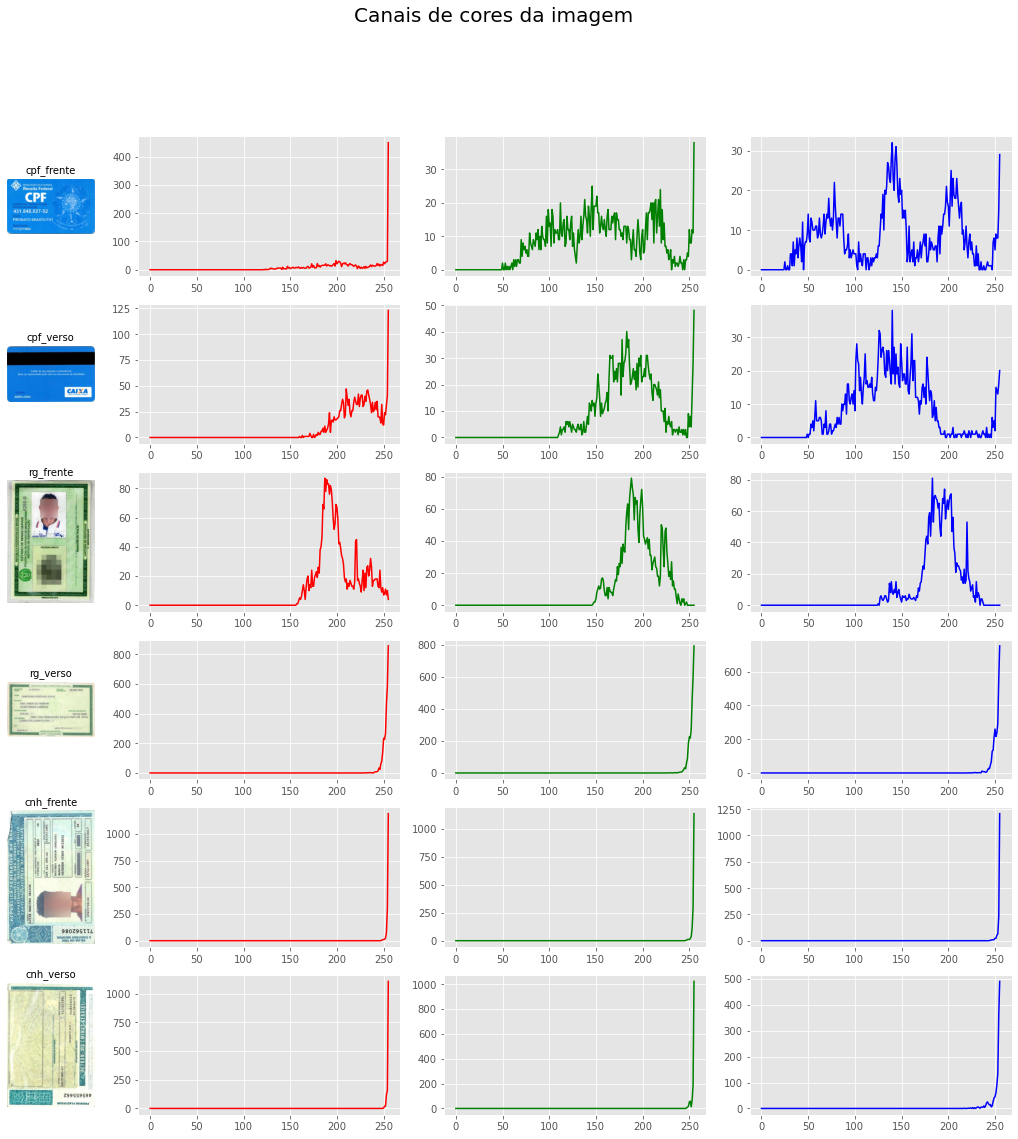

In [23]:
n = len(documentos.keys())
fig , ax = plt.subplots(6, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documentos.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[6+(cont)].plot(value['hist_red'], color='red');
    ax[12+(cont)].plot(value['hist_green'], color='green')
    ax[18+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de cores da imagem', fontsize=20)
plt.show()

## 4. Comparando os canais de cores de um mesmo documento com tons diferentes

### 4.1 Rg_frente

In [46]:
rg_frente_v = {}
rg_frente_v[0] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/rg_frente.jpg'), cv2.COLOR_BGR2RGB)}
rg_frente_v[1] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/rg_frente_2.jpg'), cv2.COLOR_BGR2RGB)}
rg_frente_v[2] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/rg_frente_3.jpg'), cv2.COLOR_BGR2RGB)}
rg_frente_v[3] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/rg_frente_4.jpg'), cv2.COLOR_BGR2RGB)}

In [47]:
for key, value in rg_frente_v.items():
    rg_frente_v[key]['hist_red'] = cv2.calcHist(rg_frente_v[key]['matriz'],[0],None,[256],[0,256])
    rg_frente_v[key]['hist_green'] = cv2.calcHist(rg_frente_v[key]['matriz'],[1],None,[256],[0,256])
    rg_frente_v[key]['hist_blue'] = cv2.calcHist(rg_frente_v[key]['matriz'],[2],None,[256],[0,256])

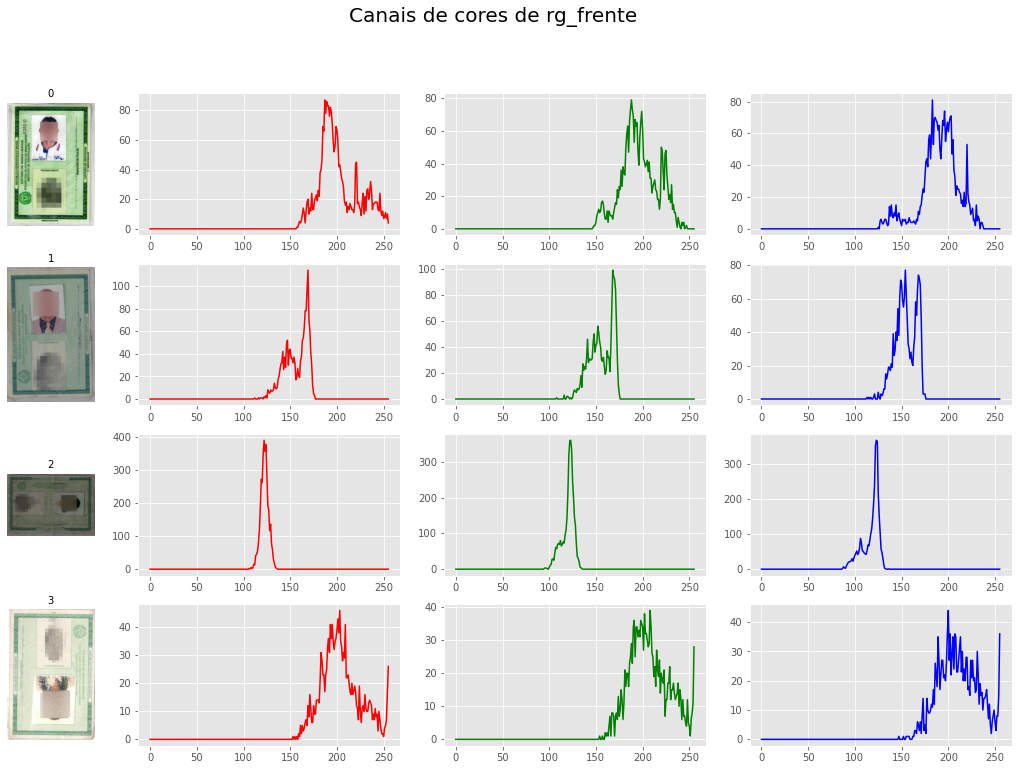

In [59]:
n = len(rg_frente_v.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in rg_frente_v.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de cores de rg_frente', fontsize=20)
plt.show()

### 4.2 Cnh_frente

In [61]:
cnh_frente_v = {}
cnh_frente_v[0] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/cnh_frente.jpg'), cv2.COLOR_BGR2RGB)}
cnh_frente_v[1] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/cnh_frente_2.jpg'), cv2.COLOR_BGR2RGB)}
cnh_frente_v[2] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/cnh_frente_3.jpg'), cv2.COLOR_BGR2RGB)}
cnh_frente_v[3] = {'matriz':cv2.cvtColor(cv2.imread('imagens_originais/cnh_frente_4.jpg'), cv2.COLOR_BGR2RGB)}

In [62]:
for key, value in cnh_frente_v.items():
    cnh_frente_v[key]['hist_red'] = cv2.calcHist(cnh_frente_v[key]['matriz'],[0],None,[256],[0,256])
    cnh_frente_v[key]['hist_green'] = cv2.calcHist(cnh_frente_v[key]['matriz'],[1],None,[256],[0,256])
    cnh_frente_v[key]['hist_blue'] = cv2.calcHist(cnh_frente_v[key]['matriz'],[2],None,[256],[0,256])

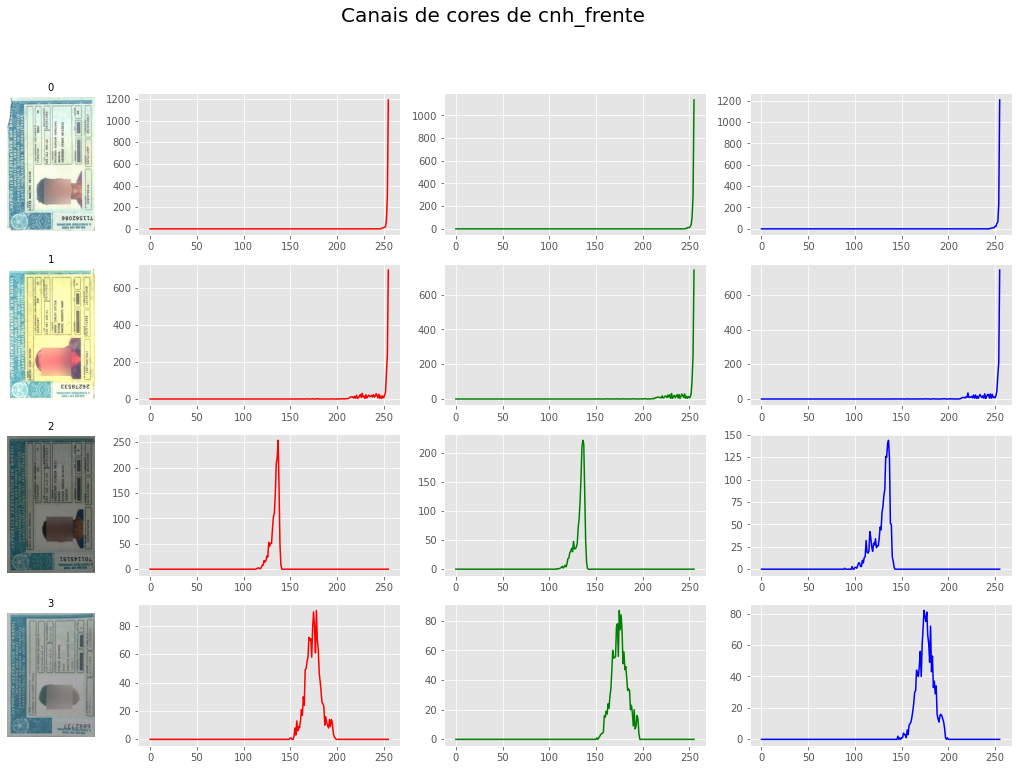

In [63]:
n = len(cnh_frente_v.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in cnh_frente_v.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de cores de cnh_frente', fontsize=20)
plt.show()

'''fig , ax = plt.subplots(1, 4, figsize=(18,5), gridspec_kw={'width_ratios': [1,3,3,3]})
ax[0].imshow(documentos['cpf_frente']['matriz']); 
ax[0].axis('off'); ax[0].set_title(key,fontsize=10)

ax[1].plot(documentos['cpf_frente']['hist_red'], color='red');
ax[2].plot(documentos['cpf_frente']['hist_green'], color='green')
ax[3].plot(documentos['cpf_frente']['hist_blue'], color='blue')

fig.suptitle('Canais de cores da imagem', fontsize=20)
plt.show()'''